In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = 0.00
beta = 0.00
scenario='sample'
output_folder = '../output/%s-%.2f-%.2f'%(scenario,alpha,beta)

In [3]:
n_plans = 16
n_agents = 100
epos_iterations = 40

In [4]:
hist = [0]*n_plans
for i in range(0,6001,300):
    plans_folder = os.path.join(output_folder,"t_%d"%i,"traffic")
    included = []
    for agent in range(n_agents):
        agent_plans_file = os.path.join(plans_folder,'agent_%d.plans'%agent)
        f = open(agent_plans_file,'r')
        if f.readline()[0]!='0':
            included.append(agent)
        f.close()
    selected_plans_file = os.path.join(output_folder,"t_%d"%i,'selected-plans.csv')
    with open(selected_plans_file, mode='r') as infile:
        reader = csv.reader(infile)
        for i in range(epos_iterations):
            next(reader)
        
        for rows in reader:
            selected_plans = rows[2:]
            
            for agent in included:
                hist[int(selected_plans[agent])]+=1
            break

In [5]:
sum(hist)

2100

In [6]:
freq = [x/sum(hist) for x in hist]

Text(0.5,1,'Selected plans: alpha=0.00, beta=0.00')

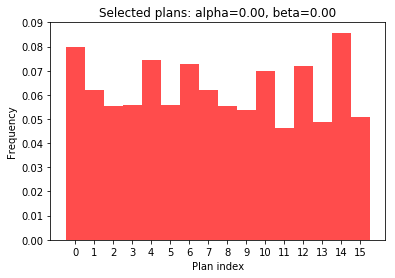

In [7]:
color = [x / 255 for x in [255,76,76]]
plt.bar(list(range(n_plans)),freq,width=1,color=color)
plt.xticks(list(range(n_plans)), list(range(n_plans)))
plt.xlabel('Plan index')
plt.ylabel('Frequency')
plt.title('Selected plans: alpha=%.2f, beta=%.2f'%(alpha,beta))